In [3]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt

from scipy.special import rel_entr

from random import seed
from random import random
import cmath
import os

from qiskit.circuit import Parameter

In [9]:
import sys
sys.path.append('../Pyfiles')
from circuits import *

In [10]:
#Possible Bin
bins_list=[];
for i in range(76):
    bins_list.append((i)/75)
#Center of the Bean
bins_x=[]    
for i in range(75):
    bins_x.append(bins_list[1]+bins_list[i])
def P_harr(l,u,N):
    return (1-l)**(N-1)-(1-u)**(N-1)
#Harr historgram
P_harr_hist=[]
for i in range(75):
    P_harr_hist.append(P_harr(bins_list[i],bins_list[i+1],16))
    
#Imaginary    
j=(-1)**(1/2)

In [11]:
backend = Aer.get_backend('qasm_simulator')
nshot=1000
nparam=2000
fidelity=[]    
for x in range(nparam):
    qr = QuantumRegister(4)
    cr = ClassicalRegister(4)
    qc = QuantumCircuit(qr, cr)
    
    theta=[];
    for y in range(80):
        theta.append(2*pi*random())
    
    qc=circuit9(qc,qr,theta,3,1)
    
    
    qc.measure(qr[:],cr[:])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()

    if '0000' in count and '1' in count:
        ratio=count['0000']/nshot
    elif '0000' in count and '1' not in count:
        ratio=count['0000']/nshot
    else:
        ratio=0
    
    fidelity.append(ratio)


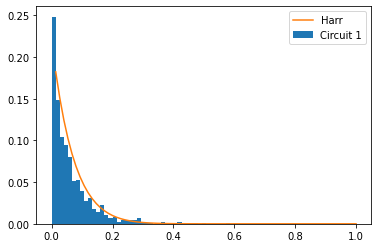

In [12]:
weights = np.ones_like(fidelity)/float(len(fidelity))
plt.hist(fidelity, bins=bins_list, weights=weights, range=[0, 1], label='Circuit 1')
plt.plot(bins_x, P_harr_hist, label='Harr')
plt.legend(loc='upper right')
plt.show()

In [13]:
# example of calculating the kl divergence (relative entropy) with scipy
P_1_hist=np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0]
kl_pq = rel_entr(P_1_hist, P_harr_hist)
print('KL(P || Q): %.3f nats' % sum(kl_pq))

KL(P || Q): 0.050 nats


In [8]:
list_of_circuit = [circuit1,circuit2,circuit3,circuit4,circuit5,circuit6,circuit7,circuit8,circuit9,circuit10,circuit11,circuit12,circuit13,circuit14,circuit15,circuit16,circuit17,circuit18,circuit19]
backend = Aer.get_backend('qasm_simulator')

arr = []
for kk in range(19):
    arr.append([])
    for lo in [1,2,3,4,5]:
        nshot=1000
        nparam=2000
        fidelity=[]
        for x in range(nparam):
            qr = QuantumRegister(4)
            cr = ClassicalRegister(4)
            qc = QuantumCircuit(qr, cr)

            theta=[];
            for y in range(500):
                theta.append(2*pi*random())

            qc=list_of_circuit[kk](qc,qr,theta,lo,1)


            qc.measure(qr[:],cr[:])
            job = execute(qc, backend, shots=nshot)
            result = job.result()
            count =result.get_counts()

            if '0000' in count and '1' in count:
                ratio=count['0000']/nshot
            elif '0000' in count and '1' not in count:
                ratio=count['0000']/nshot
            else:
                ratio=0

            fidelity.append(ratio)
            
        weights = np.ones_like(fidelity)/float(len(fidelity))
        
        # example of calculating the kl divergence (relative entropy) with scipy
        P_hist=np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0]
        kl_pq = rel_entr(P_hist, P_harr_hist)
        arr[kk].append(sum(kl_pq))
        print(kk,'cir',lo,'lay')

0 cir 1 lay
0 cir 2 lay
0 cir 3 lay
0 cir 4 lay
0 cir 5 lay
1 cir 1 lay
1 cir 2 lay
1 cir 3 lay
1 cir 4 lay
1 cir 5 lay
2 cir 1 lay
2 cir 2 lay
2 cir 3 lay
2 cir 4 lay
2 cir 5 lay
3 cir 1 lay
3 cir 2 lay
3 cir 3 lay
3 cir 4 lay
3 cir 5 lay
4 cir 1 lay
4 cir 2 lay
4 cir 3 lay
4 cir 4 lay
4 cir 5 lay
5 cir 1 lay
5 cir 2 lay
5 cir 3 lay
5 cir 4 lay
5 cir 5 lay
6 cir 1 lay
6 cir 2 lay
6 cir 3 lay
6 cir 4 lay
6 cir 5 lay
7 cir 1 lay
7 cir 2 lay
7 cir 3 lay
7 cir 4 lay
7 cir 5 lay
8 cir 1 lay
8 cir 2 lay
8 cir 3 lay
8 cir 4 lay
8 cir 5 lay
9 cir 1 lay
9 cir 2 lay
9 cir 3 lay
9 cir 4 lay
9 cir 5 lay
10 cir 1 lay
10 cir 2 lay
10 cir 3 lay
10 cir 4 lay
10 cir 5 lay
11 cir 1 lay
11 cir 2 lay
11 cir 3 lay
11 cir 4 lay
11 cir 5 lay
12 cir 1 lay
12 cir 2 lay
12 cir 3 lay
12 cir 4 lay
12 cir 5 lay
13 cir 1 lay
13 cir 2 lay
13 cir 3 lay
13 cir 4 lay
13 cir 5 lay
14 cir 1 lay
14 cir 2 lay
14 cir 3 lay
14 cir 4 lay
14 cir 5 lay
15 cir 1 lay
15 cir 2 lay
15 cir 3 lay
15 cir 4 lay
15 cir 5 lay
16 cir 1 l

In [22]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
np.savetxt("express_nshot1000_nparam2000.txt",express)

In [21]:
express

[[0.32952413239340933,
  0.2160076560690873,
  0.21764729834615873,
  0.2473835588095912,
  0.24225112795339898],
 [0.32696068662224353,
  0.02882892743034554,
  0.016267808316341933,
  0.011239533562489743,
  0.014454756871595335],
 [0.2724963267277256,
  0.09297432646189611,
  0.05316589878004338,
  0.015713919742898073,
  0.024985709696968308],
 [0.13368059415831227,
  0.04064900653499141,
  0.010705050297397748,
  0.013853567790054458,
  0.005871642903255154],
 [0.06736311068291166,
  0.018156334236215592,
  0.01063201904450228,
  0.013316433532184285,
  0.007592151156475834],
 [0.009458920213652083,
  0.008379672440371308,
  0.010342492342456355,
  0.006491253689230598,
  0.006360265144835441],
 [0.11252639719416441,
  0.048734485611284246,
  0.02917920621977864,
  0.021220914498718095,
  0.011322409296335365],
 [0.07799698630987113,
  0.03461538963835257,
  0.02645406983833787,
  0.009609047546796293,
  0.010314541867701806],
 [0.7416977310427298,
  0.4023390066678401,
  0.043645

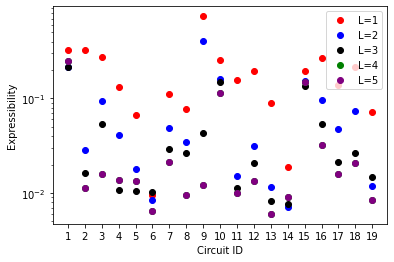

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#loading dataset

x = [i+1 for i in range(19)]
y = [i[0] for i in arr]
plt.plot(x, y, 'o', color='red', label='L=1');
x = [i+1 for i in range(19)]
y = [i[1] for i in arr]
plt.plot(x, y, 'o', color='blue', label='L=2');
x = [i+1 for i in range(19)]
y = [i[2] for i in arr]
plt.plot(x, y, 'o', color='black', label='L=3');
x = [i+1 for i in range(19)]
y = [i[3] for i in arr]
plt.plot(x, y, 'o', color='green', label='L=4');
x = [i+1 for i in range(19)]
y = [i[3] for i in arr]
plt.plot(x, y, 'o', color='purple', label='L=5');
plt.legend(loc='upper right')

plt.yscale('log',base=10) 
plt.xlabel('Circuit ID')
plt.ylabel('Expressibility')

# Create names on the x axis
plt.xticks([i+1 for i in range(19)])
plt.show()

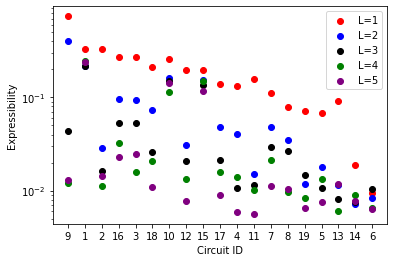

In [10]:
x = [str(i+1) for i in range(19)]
x_ticks_labels = ['9','1','2','16','3','18','10','12','15','17','4','11','7','8','19','5','13','14','6']
xarr = np.array(x)
ind = np.where(xarr.reshape(xarr.size, 1) == np.array(x_ticks_labels))[1]




fig, ax = plt.subplots(1,1) 
y = [i[0] for i in arr]
ax.scatter(ind,y, marker="o", color='red', label='L=1')
y = [i[1] for i in arr]
ax.scatter(ind,y, marker="o", color='blue', label='L=2')
y = [i[2] for i in arr]
ax.scatter(ind,y, marker="o", color='black', label='L=3')
y = [i[3] for i in arr]
ax.scatter(ind,y, marker="o", color='green', label='L=4')
y = [i[4] for i in arr]
ax.scatter(ind,y, marker="o", color='purple', label='L=5')

ax.set_yscale('log',base=10) 
ax.set_xlabel('Circuit ID')
ax.set_ylabel('Expressibility')
ax.legend(loc='upper right')

ax.set_xticks(range(len(x_ticks_labels)))
ax.set_xticklabels(x_ticks_labels)

plt.show()

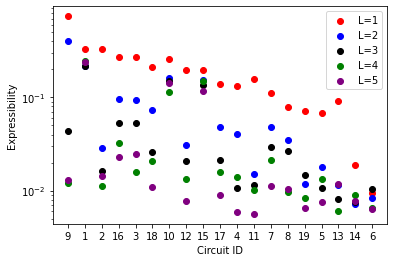

In [13]:
fig

In [14]:
from matplotlib import pyplot as plt
fig.savefig('express_nshot1000_nparam2000.png')

## Different number n=10000

In [27]:
list_of_circuit = [circuit1,circuit2,circuit3,circuit4,circuit5,circuit6,circuit7,circuit8,circuit9,circuit10,circuit11,circuit12,circuit13,circuit14,circuit15,circuit16,circuit17,circuit18,circuit19]
backend = Aer.get_backend('qasm_simulator')

arr = []
for kk in range(19):
    arr.append([])
    for lo in [1,2,3,4,5]:
        nshot=10000
        nparam=1000
        fidelity=[]
        for x in range(nparam):
            qr = QuantumRegister(4)
            cr = ClassicalRegister(4)
            qc = QuantumCircuit(qr, cr)

            theta=[];
            for y in range(500):
                theta.append(2*pi*random())

            qc=list_of_circuit[kk](qc,qr,theta,lo,1)


            qc.measure(qr[:],cr[:])
            job = execute(qc, backend, shots=nshot)
            result = job.result()
            count =result.get_counts()

            if '0000' in count and '1' in count:
                ratio=count['0000']/nshot
            elif '0000' in count and '1' not in count:
                ratio=count['0000']/nshot
            else:
                ratio=0

            fidelity.append(ratio)
            
        weights = np.ones_like(fidelity)/float(len(fidelity))
        
        # example of calculating the kl divergence (relative entropy) with scipy
        P_hist=np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0]
        kl_pq = rel_entr(P_hist, P_harr_hist)
        arr[kk].append(sum(kl_pq))
        print(kk,'cir',lo,'lay')

0 cir 1 lay
0 cir 2 lay
0 cir 3 lay
0 cir 4 lay
0 cir 5 lay
1 cir 1 lay
1 cir 2 lay
1 cir 3 lay
1 cir 4 lay
1 cir 5 lay
2 cir 1 lay
2 cir 2 lay
2 cir 3 lay
2 cir 4 lay
2 cir 5 lay
3 cir 1 lay
3 cir 2 lay
3 cir 3 lay
3 cir 4 lay
3 cir 5 lay
4 cir 1 lay
4 cir 2 lay
4 cir 3 lay
4 cir 4 lay
4 cir 5 lay
5 cir 1 lay
5 cir 2 lay
5 cir 3 lay
5 cir 4 lay
5 cir 5 lay
6 cir 1 lay
6 cir 2 lay
6 cir 3 lay
6 cir 4 lay
6 cir 5 lay
7 cir 1 lay
7 cir 2 lay
7 cir 3 lay
7 cir 4 lay
7 cir 5 lay
8 cir 1 lay
8 cir 2 lay
8 cir 3 lay
8 cir 4 lay
8 cir 5 lay
9 cir 1 lay
9 cir 2 lay
9 cir 3 lay
9 cir 4 lay
9 cir 5 lay
10 cir 1 lay
10 cir 2 lay
10 cir 3 lay
10 cir 4 lay
10 cir 5 lay
11 cir 1 lay
11 cir 2 lay
11 cir 3 lay
11 cir 4 lay
11 cir 5 lay
12 cir 1 lay
12 cir 2 lay
12 cir 3 lay
12 cir 4 lay
12 cir 5 lay
13 cir 1 lay
13 cir 2 lay
13 cir 3 lay
13 cir 4 lay
13 cir 5 lay
14 cir 1 lay
14 cir 2 lay
14 cir 3 lay
14 cir 4 lay
14 cir 5 lay
15 cir 1 lay
15 cir 2 lay
15 cir 3 lay
15 cir 4 lay
15 cir 5 lay
16 cir 1 l

In [28]:
express

[[0.32952413239340933,
  0.2160076560690873,
  0.21764729834615873,
  0.2473835588095912,
  0.24225112795339898],
 [0.32696068662224353,
  0.02882892743034554,
  0.016267808316341933,
  0.011239533562489743,
  0.014454756871595335],
 [0.2724963267277256,
  0.09297432646189611,
  0.05316589878004338,
  0.015713919742898073,
  0.024985709696968308],
 [0.13368059415831227,
  0.04064900653499141,
  0.010705050297397748,
  0.013853567790054458,
  0.005871642903255154],
 [0.06736311068291166,
  0.018156334236215592,
  0.01063201904450228,
  0.013316433532184285,
  0.007592151156475834],
 [0.009458920213652083,
  0.008379672440371308,
  0.010342492342456355,
  0.006491253689230598,
  0.006360265144835441],
 [0.11252639719416441,
  0.048734485611284246,
  0.02917920621977864,
  0.021220914498718095,
  0.011322409296335365],
 [0.07799698630987113,
  0.03461538963835257,
  0.02645406983833787,
  0.009609047546796293,
  0.010314541867701806],
 [0.7416977310427298,
  0.4023390066678401,
  0.043645

In [1]:
express=[[0.32952413239340933,
  0.2160076560690873,
  0.21764729834615873,
  0.2473835588095912,
  0.24225112795339898],
 [0.32696068662224353,
  0.02882892743034554,
  0.016267808316341933,
  0.011239533562489743,
  0.014454756871595335],
 [0.2724963267277256,
  0.09297432646189611,
  0.05316589878004338,
  0.015713919742898073,
  0.024985709696968308],
 [0.13368059415831227,
  0.04064900653499141,
  0.010705050297397748,
  0.013853567790054458,
  0.005871642903255154],
 [0.06736311068291166,
  0.018156334236215592,
  0.01063201904450228,
  0.013316433532184285,
  0.007592151156475834],
 [0.009458920213652083,
  0.008379672440371308,
  0.010342492342456355,
  0.006491253689230598,
  0.006360265144835441],
 [0.11252639719416441,
  0.048734485611284246,
  0.02917920621977864,
  0.021220914498718095,
  0.011322409296335365],
 [0.07799698630987113,
  0.03461538963835257,
  0.02645406983833787,
  0.009609047546796293,
  0.010314541867701806],
 [0.7416977310427298,
  0.4023390066678401,
  0.04364507668153466,
  0.0120927672656568,
  0.01312193911083145],
 [0.2568922048986469,
  0.159877856023638,
  0.14981483475374258,
  0.11517099082521957,
  0.14284391643493405],
 [0.15798258034579774,
  0.015098001400060396,
  0.011383645396280426,
  0.010105335417854225,
  0.005632643410627778],
 [0.19446925387256803,
  0.031175656437504834,
  0.02084429521271306,
  0.01343313112097519,
  0.00768059915246622],
 [0.09061768972578448,
  0.011526900417017642,
  0.008189880893093129,
  0.0060108893015350506,
  0.011751397567911099],
 [0.018799262840916854,
  0.007136143406884642,
  0.007623092145230341,
  0.009053624288535378,
  0.007663290417292582],
 [0.19746628980579164,
  0.15281958598891646,
  0.1355063400118548,
  0.15111662634669093,
  0.11741954724324753],
 [0.2684937151020319,
  0.09697128618178347,
  0.05370640870529413,
  0.032238736633842385,
  0.023082433062011888],
 [0.14026071817411356,
  0.047939490546422714,
  0.021117783500337883,
  0.015818882293649358,
  0.008967458429476547],
 [0.21391972052843847,
  0.07307155307919132,
  0.02627846142683268,
  0.020869197694583997,
  0.010954254599580318],
 [0.07137805144811141,
  0.01173518527289049,
  0.014645535174778783,
  0.008417810099715662,
  0.006455244968957593]]

In [29]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
np.savetxt("express_nshot10000_nparam1000.txt",express)

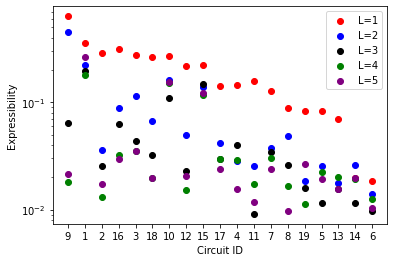

In [30]:
x = [str(i+1) for i in range(19)]
x_ticks_labels = ['9','1','2','16','3','18','10','12','15','17','4','11','7','8','19','5','13','14','6']
xarr = np.array(x)
ind = np.where(xarr.reshape(xarr.size, 1) == np.array(x_ticks_labels))[1]




fig, ax = plt.subplots(1,1) 
y = [i[0] for i in arr]
ax.scatter(ind,y, marker="o", color='red', label='L=1')
y = [i[1] for i in arr]
ax.scatter(ind,y, marker="o", color='blue', label='L=2')
y = [i[2] for i in arr]
ax.scatter(ind,y, marker="o", color='black', label='L=3')
y = [i[3] for i in arr]
ax.scatter(ind,y, marker="o", color='green', label='L=4')
y = [i[4] for i in arr]
ax.scatter(ind,y, marker="o", color='purple', label='L=5')

ax.set_yscale('log',base=10) 
ax.set_xlabel('Circuit ID')
ax.set_ylabel('Expressibility')
ax.legend(loc='upper right')

ax.set_xticks(range(len(x_ticks_labels)))
ax.set_xticklabels(x_ticks_labels)

plt.show()

(0.0, 0.1)

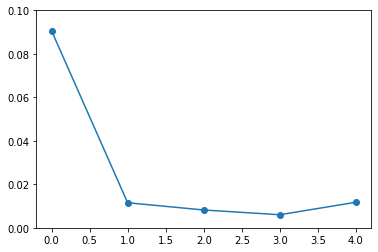

In [18]:
plt.plot(express[12], marker="o")
plt.ylim(0,0.1)

(0.0, 0.21)

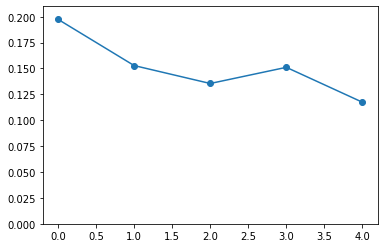

In [19]:

plt.plot(express[14], marker="o")
plt.ylim(0,0.21)

In [31]:
from matplotlib import pyplot as plt
fig.savefig('express_nshot10000_nparam1000.png')